In [8]:
 ! pip install -q kaggle

In [12]:
# Download dataset-a
import os
os.environ['KAGGLE_USERNAME'] = "bojansovtic"
os.environ['KAGGLE_KEY'] = "4ca5b00dda3b74d8cd6f8e8da5561a55"

!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

multiclass-weather-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
# Raspakovanje dataset-a
from zipfile import ZipFile
file_name = "/content/multiclass-weather-dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')


done


In [17]:
data_dir_list = os.listdir('/content/dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/dataset"))
dirs_count = len(dirs)
print(dirs_count)

['alien_test', 'rainy', 'shine', 'cloudy', 'test.csv', 'foggy', 'sunrise']
6


In [18]:
# Make new base directory
original_dataset_dir = '/content/dataset'
base_dir = '/content/weather-data/'
os.mkdir(base_dir)

In [19]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create five folders 
# (cloud, folly, rainy, shine, sunrise)

train_cloud_dir = os.path.join(train_dir, 'cloudy')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'foggy')
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'rainy')
os.mkdir(train_rainy_dir)

train_shine_dir = os.path.join(train_dir, 'shine')
os.mkdir(train_shine_dir)

train_sunrise_dir = os.path.join(train_dir, 'sunrise')
os.mkdir(train_sunrise_dir)

#Under validation folder create five folders 
# (cloud, folly, rainy, shine, sunrise)

validation_cloud_dir = os.path.join(validation_dir, 'cloudy')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'foggy')
os.mkdir(validation_foggy_dir)

validation_rainy_dir = os.path.join(validation_dir, 'rainy')
os.mkdir(validation_rainy_dir)

validation_shine_dir = os.path.join(validation_dir, 'shine')
os.mkdir(validation_shine_dir)

validation_sunrise_dir = os.path.join(validation_dir, 'sunrise')
os.mkdir(validation_sunrise_dir)

In [20]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [21]:
CLOUDY_SOURCE_DIR = '/content/dataset/cloudy/'
TRAINING_CLOUDY_DIR = '/content/weather-data/train/cloudy/'
VALID_CLOUDY_DIR = '/content/weather-data/validation/cloudy/'

FOGGY_SOURCE_DIR = '/content/dataset/foggy/'
TRAINING_FOGGY_DIR = '/content/weather-data/train/foggy/'
VALID_FOGGY_DIR = '/content/weather-data/validation/foggy/'

RAINY_SOURCE_DIR = '/content/dataset/rainy/'
TRAINING_RAINY_DIR = '/content/weather-data/train/rainy/'
VALID_RAINY_DIR = '/content/weather-data/validation/rainy/'

SHINE_SOURCE_DIR = '/content/dataset/shine/'
TRAINING_SHINE_DIR = '/content/weather-data/train/shine/'
VALID_SHINE_DIR = '/content/weather-data/validation/shine/'

SUNRISE_SOURCE_DIR = '/content/dataset/sunrise/'
TRAINING_SUNRISE_DIR = '/content/weather-data/train/sunrise/'
VALID_SUNRISE_DIR = '/content/weather-data/validation/sunrise/'

In [22]:
import random
from shutil import copyfile

split_size = .85

split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, VALID_CLOUDY_DIR, split_size)
split_data(FOGGY_SOURCE_DIR, TRAINING_FOGGY_DIR, VALID_FOGGY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR, VALID_RAINY_DIR, split_size)
split_data(SHINE_SOURCE_DIR, TRAINING_SHINE_DIR, VALID_SHINE_DIR, split_size)
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNRISE_DIR, VALID_SUNRISE_DIR, split_size)

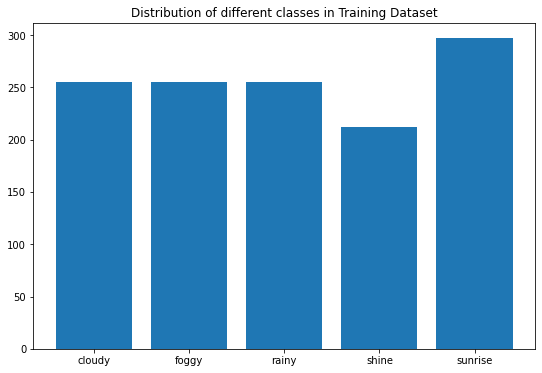

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [25]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/train/'+i+'/'))))

Training cloudy images are: 255
Training foggy images are: 255
Training rainy images are: 255
Training shine images are: 212
Training sunrise images are: 297


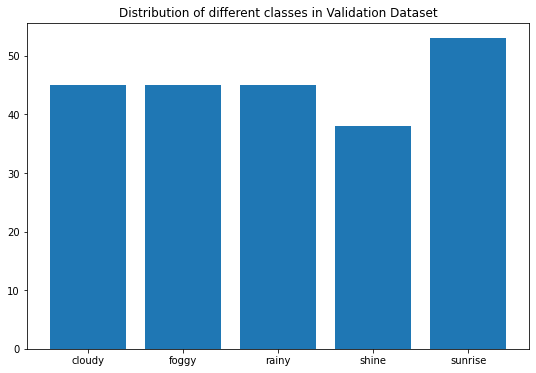

In [26]:
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather-data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [27]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/validation/'+i+'/'))))

Valid cloudy images are: 45
Valid foggy images are: 45
Valid rainy images are: 45
Valid shine images are: 38
Valid sunrise images are: 53


In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [29]:
img_width=256; img_height=256
batch_size=16

In [30]:
TRAINING_DIR = '/content/weather-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


In [31]:
VALIDATION_DIR = '/content/weather-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


In [32]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [33]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 64)        0

In [34]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [36]:
history = model.fit_generator(train_generator,
                              epochs=3,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
80/80 [==============================] - 170s 2s/step - loss: 1.3229 - accuracy: 0.3728 - val_loss: 1.1979 - val_accuracy: 0.4336
Epoch 2/3
80/80 [==============================] - 167s 2s/step - loss: 1.2793 - accuracy: 0.4223 - val_loss: 1.1966 - val_accuracy: 0.4469
Epoch 3/3
80/80 [==============================] - 167s 2s/step - loss: 1.1730 - accuracy: 0.4372 - val_loss: 1.1665 - val_accuracy: 0.4646


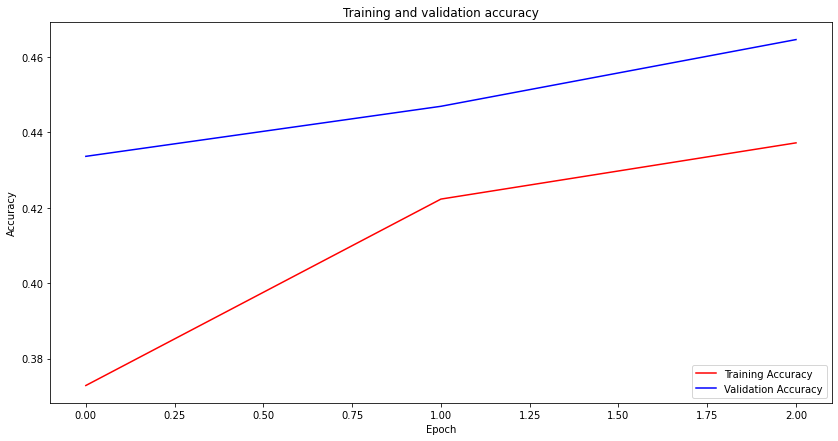

In [37]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

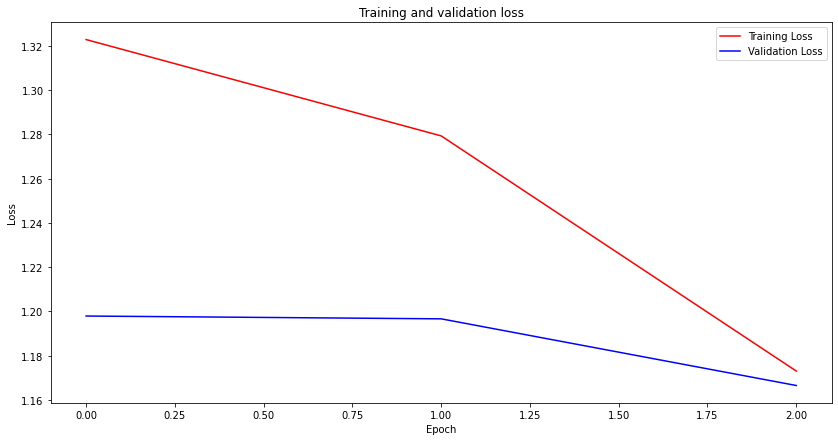

In [39]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [41]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [42]:
# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [43]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 [==============================] - 1s 37ms/step
[0 0 0 0 0 0 4 0 0 0 4 0 0 0 0 4 2 0 0 3 0 0 0 4 4 4 4 4 4 4]


In [46]:
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [49]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)
loss

1.134260080754757

In [50]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[4, 0, 0, 0, 0],
       [8, 0, 0, 0, 2],
       [3, 0, 1, 1, 1],
       [3, 0, 0, 0, 0],
       [0, 0, 0, 0, 7]])

In [51]:
train_dir = '/content/weather-data/train/'
classes = os.listdir(train_dir)

In [53]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
    else:
        cm=cm

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

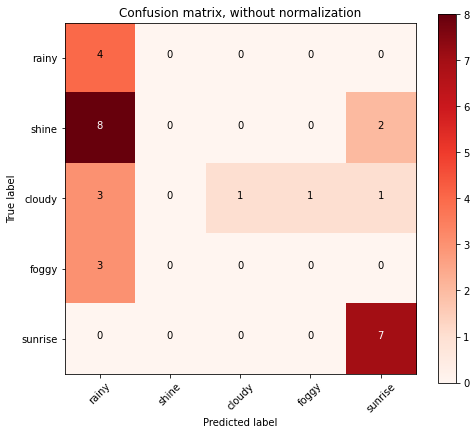

In [54]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()